In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../data/Selected_Station_Analysis_Xtab_202105242013.csv")
# Drop the null columns where all values are null
# base_df = base_df.dropna(axis='columns', how='all')
# # Drop the null rows
# base_df = base_df.dropna()
df

,Abbrev,Meas Date,Streamflow Value,Streamflow Meas Units,Streamflow Review Status,Streamflow Data Source,Unnamed: 6
0,PLADENCO,05/24/2000,398.0,cfs,A,DWR,NaN
1,PLADENCO,05/25/2000,502.0,cfs,A,DWR,NaN
2,PLADENCO,05/26/2000,435.0,cfs,A,DWR,NaN
3,PLADENCO,05/27/2000,431.0,cfs,A,DWR,NaN
4,PLADENCO,05/28/2000,412.0,cfs,A,DWR,NaN
...,...,...,...,...,...,...,...
7665,PLADENCO,05/19/2021,607.0,cfs,O,DWR,NaN
7666,PLADENCO,05/20/2021,615.0,cfs,O,DWR,NaN
7667,PLADENCO,05/21/2021,703.0,cfs,O,DWR,NaN
7668,PLADENCO,05/22/2021,635.0,cfs,O,DWR,NaN


In [4]:
# join_df = pd.read_csv("../data/2020-01-01-2021-05-23-expanded.csv")
# sample_df= join_df.iloc[range(0,512)]
# sample_df

In [5]:
# df=base_df.merge(join_df, how='left', on=['Station Name','Date'])
# df.head(512)

In [37]:
# baro=list(join_df['Soil Temperature Observed -2in (degF) Start of Day Values'].unique())
# baro

In [5]:
# convert date to numaric day of the year
dates=df['Meas Date'].astype('datetime64[ns]')
dates=dates.dt.dayofyear
df['Meas Date']=dates
df

,Abbrev,Meas Date,Streamflow Value,Streamflow Meas Units,Streamflow Review Status,Streamflow Data Source,Unnamed: 6
0,PLADENCO,145,398.0,cfs,A,DWR,NaN
1,PLADENCO,146,502.0,cfs,A,DWR,NaN
2,PLADENCO,147,435.0,cfs,A,DWR,NaN
3,PLADENCO,148,431.0,cfs,A,DWR,NaN
4,PLADENCO,149,412.0,cfs,A,DWR,NaN
...,...,...,...,...,...,...,...
7665,PLADENCO,139,607.0,cfs,O,DWR,NaN
7666,PLADENCO,140,615.0,cfs,O,DWR,NaN
7667,PLADENCO,141,703.0,cfs,O,DWR,NaN
7668,PLADENCO,142,635.0,cfs,O,DWR,NaN


In [8]:
df.columns


Index(['Abbrev', 'Meas Date', 'Streamflow Value', 'Streamflow Meas Units',
       'Streamflow Review Status', 'Streamflow Data Source', 'Unnamed: 6'],
      dtype='object')

In [9]:
wanted_columns_df=['Meas Date', 'Streamflow Value']
new_df=df.loc[:, wanted_columns_df]
new_df

,Meas Date,Streamflow Value
0,145,398.0
1,146,502.0
2,147,435.0
3,148,431.0
4,149,412.0
...,...,...
7665,139,607.0
7666,140,615.0
7667,141,703.0
7668,142,635.0


In [10]:
# one_hot = pd.get_dummies(df['Station Name'])
# # Drop column as it is now encoded
# data_df = df.drop(['Station Name'],axis = 1)
# # Join the encoded df
# data_df = data_df.join(one_hot)
# data_df 

In [11]:
# data_df=data_df.fillna(0)
# data_df

In [94]:
## Did not effect the model score much if at all
# data=data_df[data_df['Date'].values < 318]
# data=data_df[data_df['Date'].values < 136]
# data

In [95]:
# clean_df.to_csv('../data/SnowDataEncoded.csv')

In [12]:
list(new_df.columns)

['Meas Date', 'Streamflow Value']

In [45]:
df[['Precipitation Increment - Snow-adj (in)', 'Change In Snow Depth (in)']].corr()

,Precipitation Increment - Snow-adj (in),Change In Snow Depth (in)
Precipitation Increment - Snow-adj (in),1.000000,0.047642
Change In Snow Depth (in),0.047642,1.000000


In [15]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# y = clean_df.loc[:20000, 'Change In Snow Depth (in)'].values.reshape(-1, 1)

y = new_df['Streamflow Value'].values.reshape(-1, 1)
# test_df['Date']=test_df['Date'].astype('int')
# pd.get_dummies(#.values.reshape(-1, 1)
X=new_df['Meas Date'].values.reshape(-1, 1)
# X.head()

print("Shape: ", X.shape, y.shape)
X

Shape:  (7670, 1) (7670, 1)


array([[145],
       [146],
       [147],
       ...,
       [141],
       [142],
       [143]], dtype=int64)

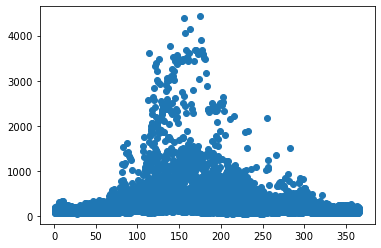

In [16]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [17]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [18]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.
model.fit(X, y)

LinearRegression()

In [19]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.3282466]]
y-axis intercept:  [367.35803461]


In [39]:
# len(features_list)

In [39]:
x_m = np.array([[175]])
model.predict(x_m)

array([[309.91487975]])

In [40]:
model.score(X, y)

0.0064803406293282295

In [42]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[101]]
Max X Value: [[1231]]


In [43]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

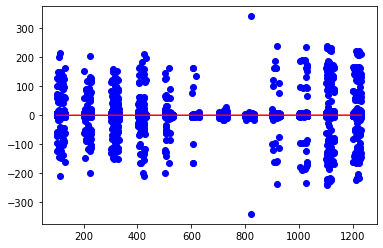

In [44]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')